In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

## Load data

In [26]:
RAW_DATA_PATH = '../data/raw'

In [27]:
train_data = pd.read_csv('{}/train.csv'.format(RAW_DATA_PATH))
test_data = pd.read_csv('{}/test.csv'.format(RAW_DATA_PATH))

#### There's 2 types of data
1. train_data -- manually labeled data for model training
3. test_data -- manually labeled data for test

## Data Analysis

### Number of samples

In [28]:
print('Train data shape                 :', train_data.shape)
print('Test data shape                  :', test_data.shape)

Train data shape                 : (6995, 6)
Test data shape                  : (778, 6)


### Dataframe head

In [29]:
train_data.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0


In [30]:
test_data.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik
0,"1.BUKAN CM SPANDUK PROF,VIDEO2 ORASI MEREKA, B...",twitter,0,0,1,0
1,@memeqbeceq gy sange'gatel yh tetek'memekY drn...,twitter,1,0,0,0
2,Pertama kali denger lagunya enk bgt in dan png...,instagram,0,0,0,0
3,"astajim, ini pasti yg kasih penghargaan ke ibu...",kaskus,0,0,0,0
4,beda kalo disini kalo komplain lgs di bully am...,kaskus,0,0,0,0


Text is still raw, need processing before used for model training

### Label distribution

In [32]:
labels = ['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik']

In [33]:
def get_label_distribution(data, label):
    return np.sum(data[label]) / data.shape[0]

In [34]:
for label in labels:
    print('% of train data containing', label, 'label:', '{0:.2%}'.format(get_label_distribution(train_data, label)))

% of train data containing pornografi label: 22.50%
% of train data containing sara label: 16.07%
% of train data containing radikalisme label: 16.50%
% of train data containing pencemaran_nama_baik label: 31.17%


In [35]:
for label in labels:
    print('% of test data containing', label, 'label:', '{0:.2%}'.format(get_label_distribution(test_data, label)))

% of test data containing pornografi label: 22.24%
% of test data containing sara label: 14.65%
% of test data containing radikalisme label: 15.68%
% of test data containing pencemaran_nama_baik label: 31.49%


***Insight:*** Pretty similar label distribution between train and test data

## Word Count

In [36]:
train_data['word_count'] = train_data['original_text'].apply(lambda x: len(x.split()))

In [38]:
train_data['word_count'].describe()

count    6995.000000
mean       44.541387
std        92.940414
min         7.000000
25%        20.000000
50%        23.000000
75%        35.000000
max      2500.000000
Name: word_count, dtype: float64

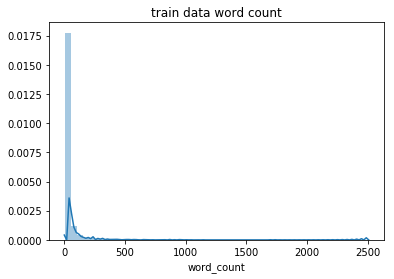

In [39]:
plt.title('train data word count')
sns.distplot(train_data['word_count'])

In [40]:
test_data['word_count'] = test_data['original_text'].apply(lambda x: len(x.split()))

In [41]:
test_data['word_count'].describe()

count    778.000000
mean      37.255784
std       56.557781
min       11.000000
25%       20.000000
50%       23.000000
75%       34.000000
max      748.000000
Name: word_count, dtype: float64

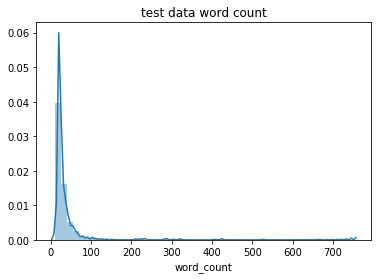

In [43]:
plt.title('test data word count')
sns.distplot(test_data['word_count'])

It's not surprising that 75% of the text have <= 34 words since it's gathered from social media post

### Text Analysis

In [45]:
for i in range(10):
    print('>>>>> TEXT #{}'.format(i + 1))
    print(train_data['original_text'].values[i])

>>>>> TEXT #1
[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e]jabar emng propinsi barokah :lehuga[/QUOTE]\n\nWOI, ANJING GOBLOK\nPROPINSI YANG PALING BANYAK NGERUSAK DAN NGEBAKAR GEREJA ITU JATIM, GAK LU SEBUT PROPINSI LUMBUNG NASBUNG TUH JATIM?\nPROPINSI PENGHASIL GEMBONG TERORIS TERBANYAK ITU JATENG, GAK LU SEBUT LUMBUNG NASBUNG TUH JATENG?\nNGARANG STEREOTIP KOK PILIAH PILIH?\nBANGGSAT LU PECUN

>>>>> TEXT #2
@verosvante kita2 aja nitizen yang pada kepo,toh keluarga besar pasti udh pada tau,situ jg kalo urusan nya diurusin orang pasti ngamuk2,ngedumel "ngasih makan engga sibuk ngurusin urusan gw"yakan?setiap orang pnya cara masng2 buat mensyukuri kebahagiaannya ,ada yg di publis ada yg disimpen yg pntng tujuannya apa!trus kalo soal hijrahnya karna habib ya berarti Allah ngasih jalannya lewat situ,kan jalan hijrah manusia itu msng2 pintunya ,jgn so tau makanya
>>>>> TEXT #3
"#SidangAhok smg sipenista agama n ateknya matinya tdk wjar n jasadnya tdk dtrma tnh n dia tdk prnh mrs kn sorga

#### Text contains:
- Platform specific formatting (e.g. twitter mention)
- Slang words
- Excessive newline / whitespace
- Shorten words
- many more

***What's next:*** Need to processed this text!